In [18]:
import numpy as np
import matplotlib.pyplot as plt
import re

In [19]:
tau = 0.01
h   = 0.01
testsData = np.linspace(200, 2000, 30)

In [20]:
# store tests results of naive run

naive     = np.zeros(testsData.size)
parallel4 = np.zeros(testsData.size)
acceleration4 = np.zeros(testsData.size)

for i in range(testsData.size):
    K = M = testsData[i]
    
    # execute naive algo
    out = !./naive.out {K} {M} {tau} {h}
    regexMatch = re.search("\d+\.\d+(e-\d+)*", out[0])
    naive[i] = regexMatch[0]
    
    # execute parallel algo
    out = !mpirun -N 4 ./parallel.out {K} {M} {tau} {h}
    regexMatch = re.search("\d+\.\d+(e-\d+)*", out[0])
    parallel4[i] = regexMatch[0]
    
    acceleration4[i] = naive[i] / parallel4[i] / 4
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


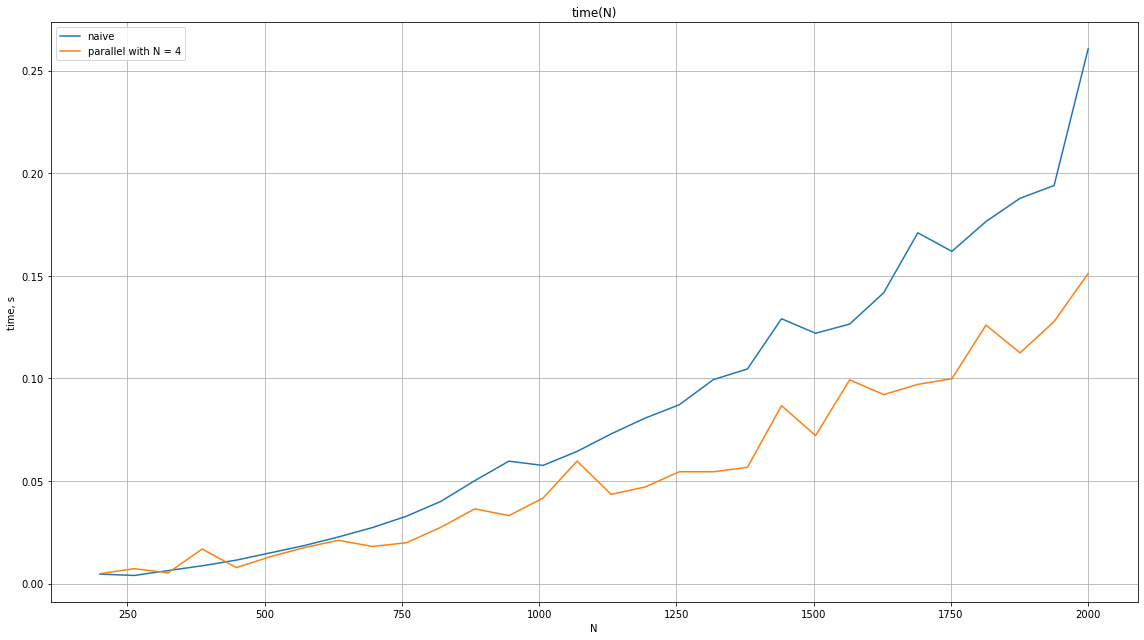

In [21]:
plt.figure(figsize = [16, 9])
plt.plot(testsData, naive, label="naive")
plt.plot(testsData, parallel4, label="parallel with N = 4")
plt.title(label = 'time(N)')
plt.xlabel("N")
plt.ylabel("time, s")
plt.tight_layout() 
plt.legend()
plt.grid()
plt.show()

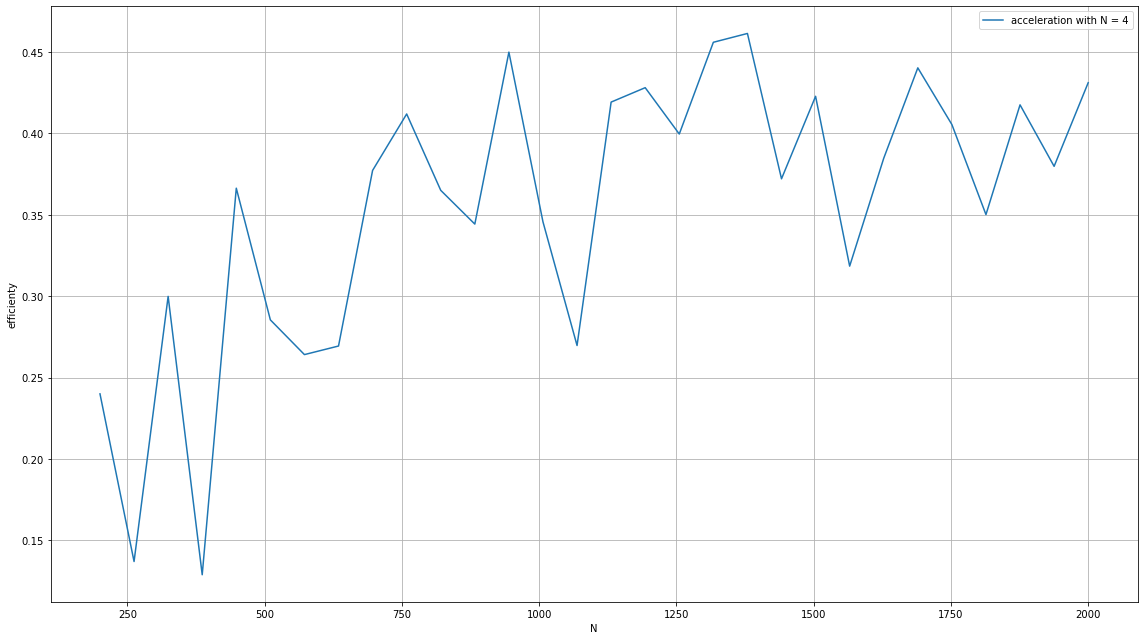

In [22]:
plt.figure(figsize = [16, 9])
plt.plot(testsData, acceleration4, label="acceleration with N = 4")
plt.xlabel("N")
plt.ylabel("efficienty")
plt.tight_layout() 
plt.legend()
plt.grid()
plt.show()